In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
matplotlib.rc('font',family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [3]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')

In [4]:
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
df_raw['JOB'].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

/tmp/ipykernel_32467/3804713323.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace = True)


In [7]:
df_raw.isnull().sum(axis=0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [8]:
df_train ,df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

In [9]:
print(df_train.shape)
print(df_test.shape)

(2623, 13)
(1125, 13)


In [10]:
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + CLNO + DEBTINC""", df_train)

In [11]:
log_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.238418
         Iterations 8


In [12]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2231
Time:                        15:23:24   Log-Likelihood:                -625.37
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 2.657e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.9437      0.554     -8.922      0.000      -6.030      -3.858
C(REASON)[T.HomeImp]    -0.0488      0.175     -0.279      0.780      -0.392       0.295
C(JOB)[T.Off

In [13]:
y_pred_train = log_result.predict(df_train)

In [14]:
y_pred_train_class = (y_pred_train > 0.5).astype(int)
y_pred_train_class

3164    0
3314    1
93      0
1456    0
3327    0
       ..
3276    0
3125    0
1318    0
723     0
2863    0
Length: 2623, dtype: int64

In [15]:
print("train 예측결과 \n", y_pred_train_class.head(), '\n')
print("confusion matrix \n", confusion_matrix(df_train['BAD'], y_pred_train_class))

train 예측결과 
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

confusion matrix 
 [[2365   17]
 [ 189   52]]


In [16]:
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("test 예측결과 \n", y_pred_test_class.head(), '\n')
print("confusion matrix \n", confusion_matrix(df_test['BAD'], y_pred_test_class))

test 예측결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

confusion matrix 
 [[1017    4]
 [  81   23]]


In [17]:
print('Train 예측 결과')
print("Accuracy:",accuracy_score(df_train['BAD'],y_pred_train_class),'\n')
print("confusion matrix \n", confusion_matrix(df_test['BAD'], y_pred_test_class),'\n')
print(classification_report(df_test['BAD'],y_pred_test_class,digits=3))

Train 예측 결과
Accuracy: 0.9214639725505147 

confusion matrix 
 [[1017    4]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.996     0.960      1021
           1      0.852     0.221     0.351       104

    accuracy                          0.924      1125
   macro avg      0.889     0.609     0.656      1125
weighted avg      0.919     0.924     0.904      1125



In [18]:
df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]},index = log_model.exog_names[1:])

<AxesSubplot:>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


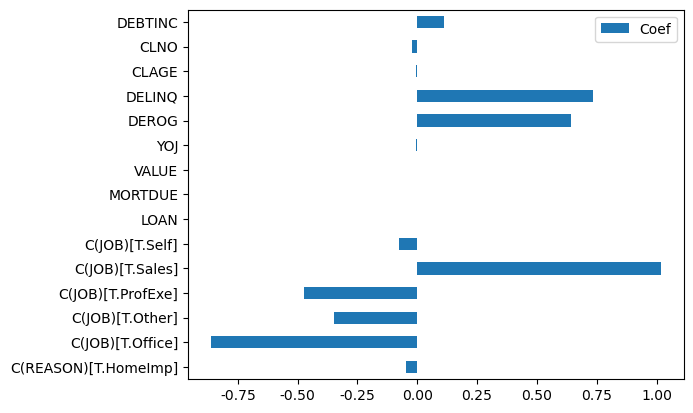

In [19]:
df_logistic_coef.plot.barh(y='Coef')

In [20]:
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

In [21]:
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

In [22]:
df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [23]:
df_scaled['BAD'] = np.where(df_scaled['BAD']>0,1,0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [24]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [25]:
scaled_log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + CLNO + DEBTINC", df_scaled_train)

In [26]:
scaled_log_result = scaled_log_model.fit()

Optimization terminated successfully.
         Current function value: 0.238418
         Iterations 7


In [27]:
print(scaled_log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2231
Time:                        15:23:25   Log-Likelihood:                -625.37
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 2.657e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4339      0.202    -12.024      0.000      -2.831      -2.037
C(REASON)[T.HomeImp]    -0.0488      0.175     -0.279      0.780      -0.392       0.295
C(JOB)[T.Off

In [28]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])

<AxesSubplot:>

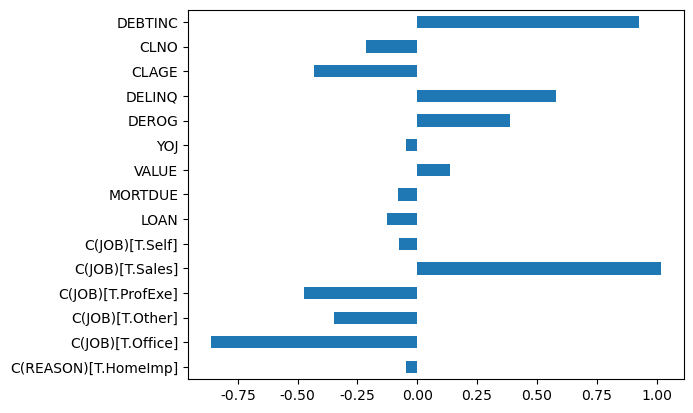

In [29]:
df_log_scaled_coef.plot.barh(y = "Coef",legend=False)

의사결정나무

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
import os
os.environ['PATH'] += os.pathsep + "/home/piai/anaconda3/pkgs/graphviz-2.50.0-h3cd0ef9_0/bin/"

In [32]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')

In [33]:
df_raw['JOB'].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

/tmp/ipykernel_32467/3804713323.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace = True)


In [34]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

In [35]:
df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

In [36]:
print('분할전 설명변수', df_raw_x.shape)
print('분할 후 설명변수: train:',df_train_x.shape,'test',df_test_x.shape)

분할전 설명변수 (3748, 18)
분할 후 설명변수: train: (2623, 18) test (1125, 18)


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
print(df_raw.value_counts(['BAD']),'\n')
print("BAD = 1 비율", df_raw.value_counts(df_raw['BAD']==1)/len(df_raw))

BAD
0      3403
1       345
dtype: int64 

BAD = 1 비율 BAD
False    0.907951
True     0.092049
dtype: float64


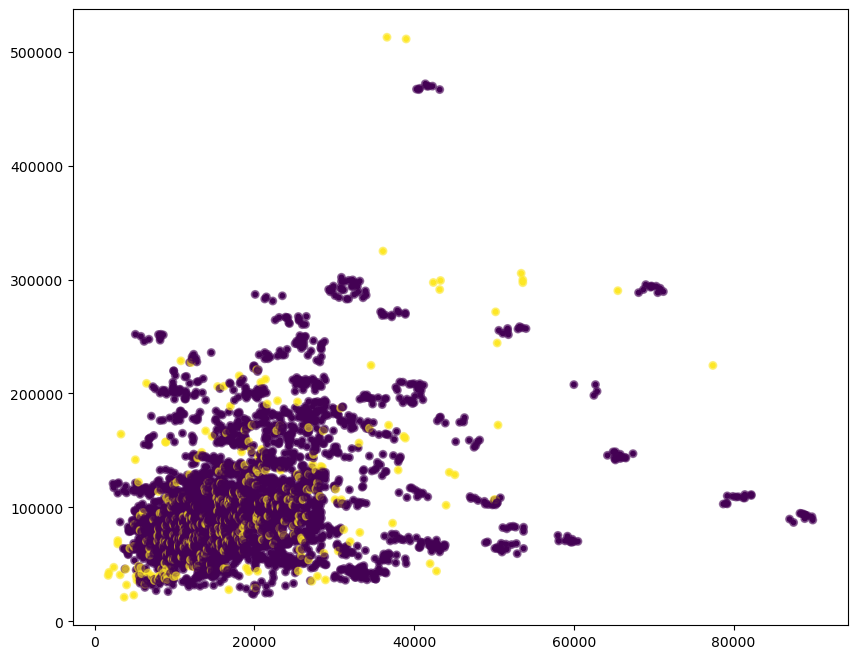

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(df_raw['LOAN'], df_raw['VALUE'], c=df_raw['BAD'], s=10)
plt.scatter(df_raw['LOAN'], df_raw['VALUE'], c=df_raw['BAD'], s=30, alpha=0.5)
plt.show()

In [45]:
sm = SMOTE(sampling_strategy = 'auto')

x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print('오버샘플링 전 : \n', df_train_y.value_counts(),'\n')
print('오버샘플링 후 Train X: \n', x_resampled.shape)
print('오버샘플링 후 Train X: \n', y_resampled.shape)
print('오버샘플링 후 1:', sum(y_resampled==1))
print('오버샘플링 후 0:', sum(y_resampled==0))

오버샘플링 전 : 
 0    2382
1     241
Name: BAD, dtype: int64 

오버샘플링 후 Train X: 
 (4764, 18)
오버샘플링 후 Train X: 
 (4764,)
오버샘플링 후 1: 2382
오버샘플링 후 0: 2382


In [47]:
tree_uncust = DecisionTreeClassifier(random_state = 1234)
tree_uncust.fit(df_train_x, df_train_y)

DecisionTreeClassifier(random_state=1234)

In [51]:
print('트레이닝셋의 정확도:', tree_uncust.score(df_train_x,df_train_y))
print('테스트셋의 정확도:', tree_uncust.score(df_test_x,df_test_y))
#과적합 확인

트레이닝셋의 정확도: 1.0
테스트셋의 정확도: 0.9315555555555556


In [53]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [55]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [56]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


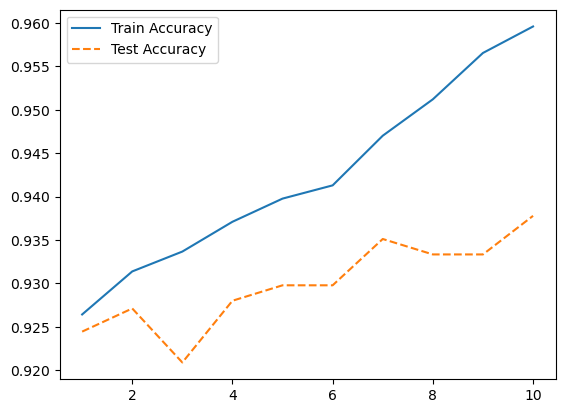

In [57]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

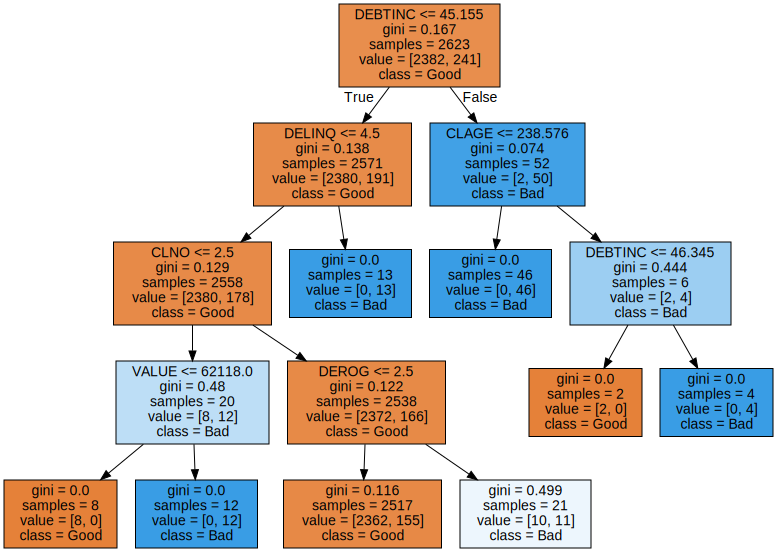

In [58]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ['Good','Bad'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [64]:
train_accuracy = []
test_accuracy = []

para_split = [n_split *10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 6, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.941,0.929
1,20,0.939,0.926
2,30,0.934,0.918
3,40,0.934,0.918
4,50,0.934,0.918
5,60,0.934,0.918
6,70,0.934,0.918
7,80,0.934,0.918
8,90,0.934,0.918
9,100,0.934,0.918


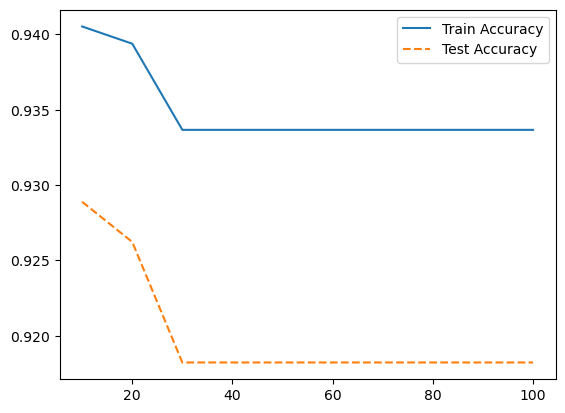

In [66]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

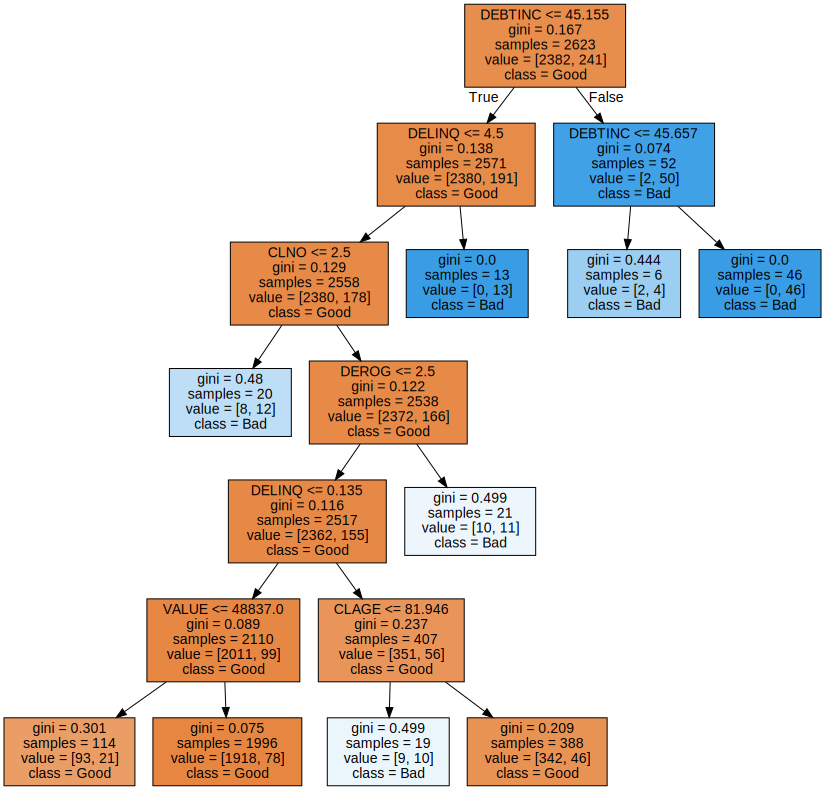

In [68]:
tree_low = DecisionTreeClassifier(min_samples_split = 30, max_depth = 6, random_state = 1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ['Good','Bad'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [72]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf *2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20, max_depth = 6, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.939,0.926
1,4,0.939,0.926
2,6,0.939,0.926
3,8,0.939,0.926
4,10,0.938,0.927
5,12,0.934,0.918
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


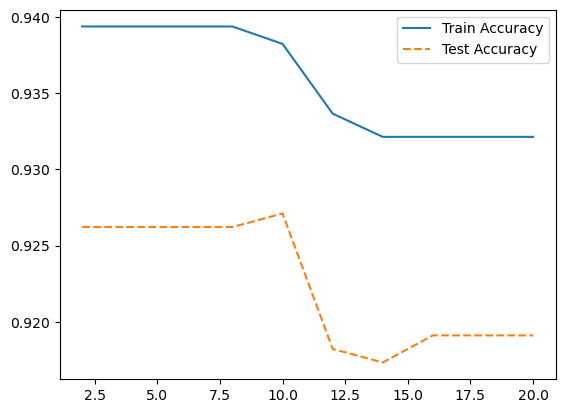

In [73]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

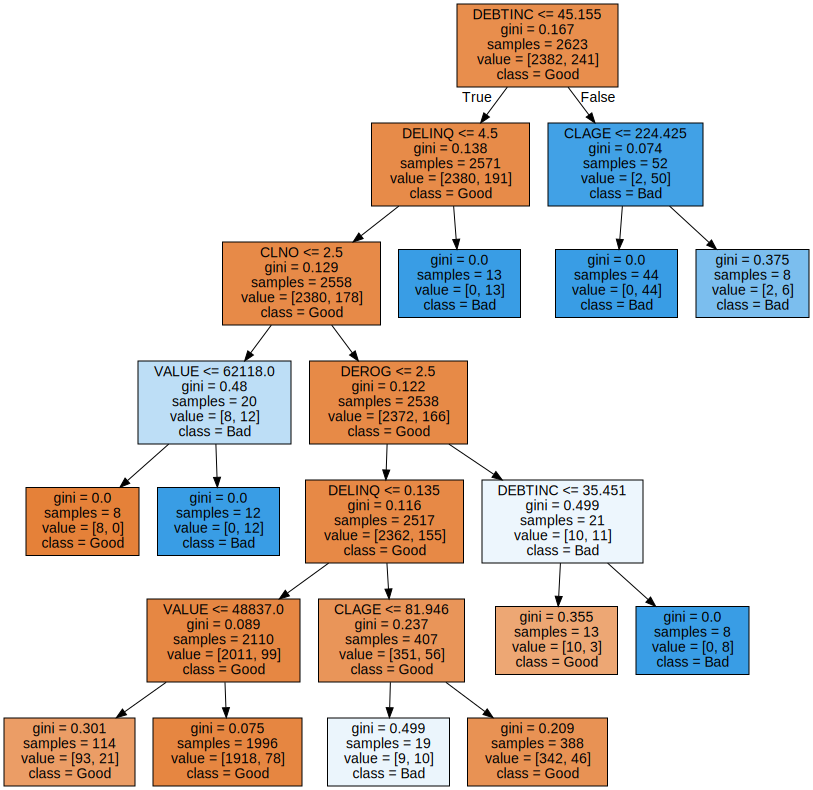

In [74]:
tree_low = DecisionTreeClassifier(min_samples_leaf = 8,min_samples_split = 20, max_depth = 6, random_state = 1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ['Good','Bad'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [77]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 8,min_samples_split = 20, max_depth = 6, random_state = 1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20,
                       random_state=1234)

In [80]:
y_pred = tree_final.predict(df_test_x)
print('정확성:',tree_final.score(df_test_x,df_test_y))
print('Confusion Matrix:\n',confusion_matrix(df_test_y,y_pred))

정확성: 0.9262222222222222
Confusion Matrix:
 [[1015    6]
 [  77   27]]


In [83]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

In [84]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.554
5,DELINQ,0.180
2,VALUE,0.091
8,CLNO,0.073
4,DEROG,0.057
6,CLAGE,0.044
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '설명변수')

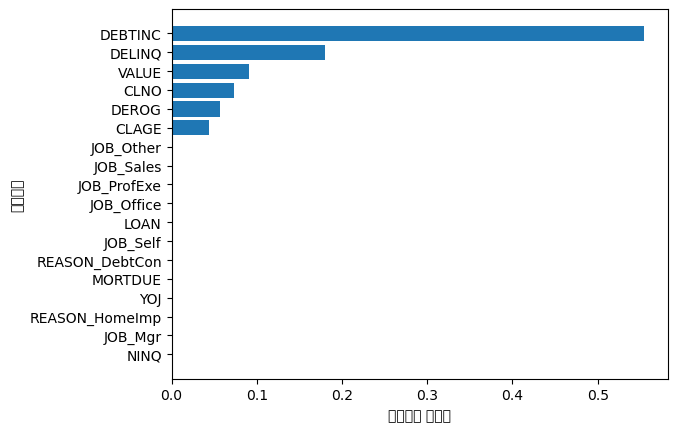

In [87]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [89]:
#랜덤포레스트
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')
df_raw['JOB'].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']
df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

/tmp/ipykernel_32467/235851729.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace = True)


In [91]:
rf_uncust = RandomForestClassifier(random_state = 1234)
rf_uncust.fit(df_train_x, df_train_y)

RandomForestClassifier(random_state=1234)

In [92]:
print('트레이닝셋의 정확도:', rf_uncust.score(df_train_x,df_train_y))
print('테스트셋의 정확도:', rf_uncust.score(df_test_x,df_test_y))

트레이닝셋의 정확도: 1.0
테스트셋의 정확도: 0.9457777777777778


In [93]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


In [98]:
#트리수 조정
train_accuracy = []
test_accuracy = []

para_n_tree = [n_tree *10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


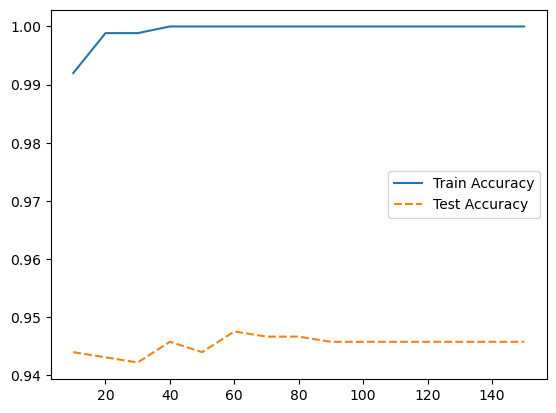

In [99]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [100]:
oob_error = []
for i in range(1,151):
    rf = RandomForestClassifier(n_estimators = i, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 -rf.oob_score_)

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do no

Text(0.5, 0, 'n_estimator')

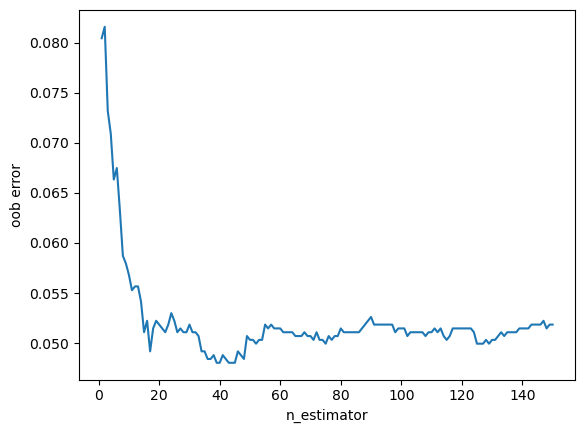

In [101]:
plt.plot(range(1,151),oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimator')

In [102]:
#트리 깊이 조정
train_accuracy = []
test_accuracy = []

para = [j for j in range(1,11)]

for i in para:
    rf = RandomForestClassifier(max_depth = i, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_depth'] = para
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n.round(3)

,n_depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


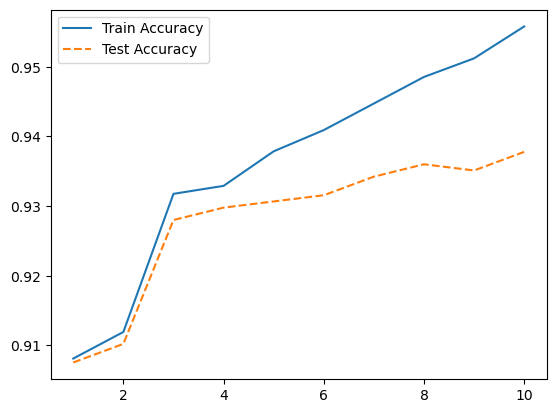

In [103]:
plt.plot(para, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [104]:
#분리 노드 조정
train_accuracy = []
test_accuracy = []

para = [j *10 for j in range(1,11)]

for i in para:
    rf = RandomForestClassifier(min_samples_split = i, max_depth = 6, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_split'] = para
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n.round(3)

,n_split,TrainAccuracy,TestAccuracy
0,10,0.940,0.931
1,20,0.935,0.931
2,30,0.934,0.931
3,40,0.934,0.931
4,50,0.933,0.931
5,60,0.933,0.931
6,70,0.934,0.931
7,80,0.932,0.929
8,90,0.932,0.929
9,100,0.932,0.929


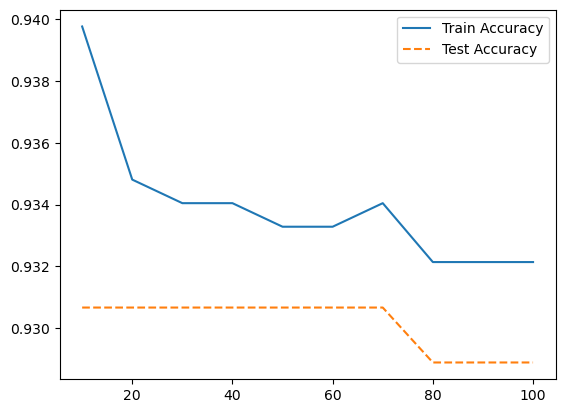

In [105]:
plt.plot(para, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [106]:
#잎사귀 노드 최소 자료수 조정
train_accuracy = []
test_accuracy = []

para = [j * 5 for j in range(1,11)]

for i in para:
    rf = RandomForestClassifier(min_samples_leaf = i , max_depth = 6, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_leaf'] = para
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n.round(3)

,n_leaf,TrainAccuracy,TestAccuracy
0,5,0.939,0.932
1,10,0.933,0.930
2,15,0.927,0.927
3,20,0.927,0.925
4,25,0.927,0.925
5,30,0.926,0.924
6,35,0.926,0.924
7,40,0.925,0.924
8,45,0.923,0.921
9,50,0.914,0.915


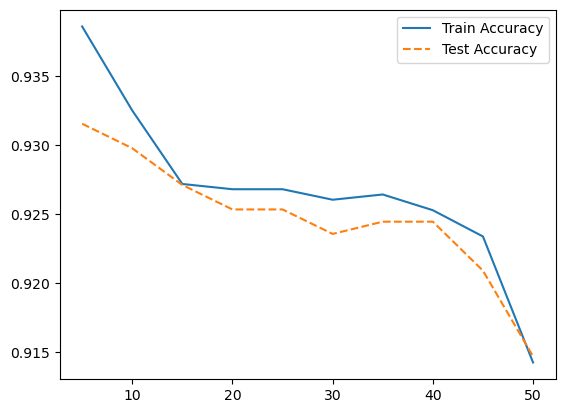

In [107]:
plt.plot(para, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [108]:
rf_final = RandomForestClassifier(min_samples_leaf = 20,n_estimators = 100, max_depth = 6, random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=20, random_state=1234)

In [109]:
y_pred = rf_final.predict(df_test_x)
print('정확성(train):',rf_final.score(df_train_x,df_train_y))
print('정확성(test):',rf_final.score(df_test_x,df_test_y))
print('Confusion Matrix:\n',confusion_matrix(df_test_y,y_pred))

정확성(train): 0.9268013724742661
정확성(test): 0.9253333333333333
Confusion Matrix:
 [[1021    0]
 [  84   20]]


In [111]:
print(classification_report(df_test_y,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



In [112]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.502
5,DELINQ,0.148
6,CLAGE,0.064
4,DEROG,0.058
8,CLNO,0.056
7,NINQ,0.050
0,LOAN,0.036
2,VALUE,0.036
3,YOJ,0.016
1,MORTDUE,0.014


Text(0, 0.5, '설명변수')

/home/piai/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/hom

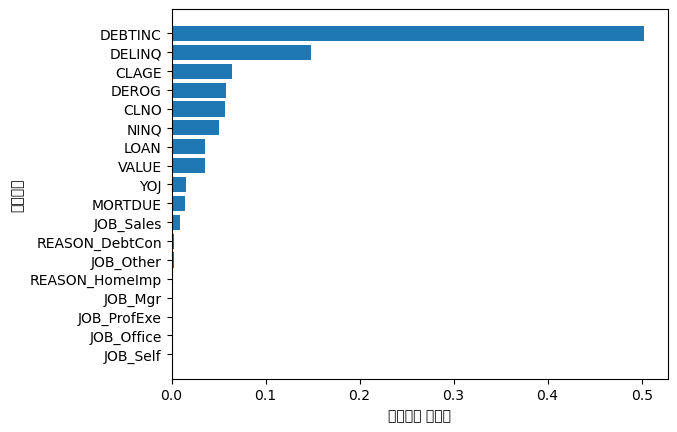

In [113]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")